# IV - Objectif une meilleure santé pour tous : Application Smart Food

Un classement des aliments et le calcul de leur combinaison permettront d'améliorer la santé des français et les guider vers une alimentation équilibrée sans se priver.

## 1) Classement des aliments

Etudions de plus près nos aliments et regardons qu'elles sont les variables qui permettent d'expliquer au mieux cette population.


Pour commencer, il nous faut exclure les données manquantes et étudier les variables quantitatives qui sont corrélées.

In [1]:
data.columns

NameError: name 'data' is not defined

In [2911]:
data_quanti=data[['additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n','energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 
       'ingredients_from_palm_oil', ]]

## a) Corrélations entre les variables quantitatives

Regardons les variables corrélées.

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
additives_n,1.000000,0.079260,0.306354,0.214185,0.140782,0.166701,0.146996,0.094282,-0.090824,0.023585,0.028032,0.028071
ingredients_from_palm_oil_n,0.079260,1.000000,0.129211,0.007568,0.031469,0.051081,0.004500,-0.017597,-0.007249,-0.018253,0.007822,0.008002
ingredients_that_may_be_from_palm_oil_n,0.306354,0.129211,1.000000,0.096659,0.076197,0.115050,0.071110,0.058665,-0.037885,-0.025630,-0.017357,-0.017341
energy_100g,0.214185,0.007568,0.096659,1.000000,0.659098,0.462246,0.464224,0.216972,0.111850,0.437464,0.113597,0.113471
fat_100g,0.140782,0.031469,0.076197,0.659098,1.000000,0.723534,-0.033643,-0.113009,-0.026129,0.265703,0.088227,0.088155
saturated_fat_100g,0.166701,0.051081,0.115050,0.462246,0.723534,1.000000,0.002535,0.017851,-0.071198,0.169111,0.009396,0.009345
carbohydrates_100g,0.146996,0.004500,0.071110,0.464224,-0.033643,0.002535,1.000000,0.622072,0.301581,-0.166193,0.018633,0.018515
sugars_100g,0.094282,-0.017597,0.058665,0.216972,-0.113009,0.017851,0.622072,1.000000,-0.083255,-0.279099,-0.055417,-0.055500
fiber_100g,-0.090824,-0.007249,-0.037885,0.111850,-0.026129,-0.071198,0.301581,-0.083255,1.000000,0.063904,0.003881,0.003837
proteins_100g,0.023585,-0.018253,-0.025630,0.437464,0.265703,0.169111,-0.166193,-0.279099,0.063904,1.000000,0.138959,0.138884


Text(62.953124999999986, 0.5, 'Variables')

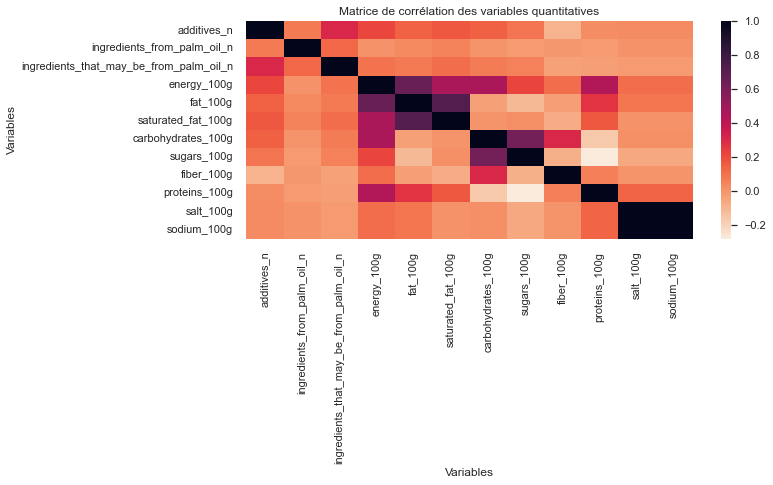

In [2917]:
sns.set(rc={'figure.figsize':(10,4)})

data_corr = data_quanti.corr()

display(data_corr)
ax = sns.heatmap(data_corr, xticklabels = data_corr.columns , 
                 yticklabels = data_corr.columns, cmap = 'rocket_r')
plt.title("Matrice de corrélation des variables quantitatives")

plt.xlabel("Variables")

plt.ylabel("Variables")

Cette matrice nous permet d'identifier les variables corrélées : 
- fat_100g et saturated_fat_100g
- carbohydrates_100g et sugars_100g
- energy_100g et fat_100g
- salt_100g et sodium_100g
- additives_n et ingredients_that_may_be_from_palm_oil_n

## b) Analyse en composante principale

Il est necessaire de conserver une des variables corrélées car elles n'apportent aucune information supplémentaires.
Nous excluons les variables suivantes : 
- saturated_fat_100g
- sugars_100g
- energy_100g
- sodium_100g
- ingredients_that_may_be_from_palm_oil_n

In [2974]:
data_study.columns

Index(['code', 'product_name', 'ingredients_text', 'energy_100g',
       'carbohydrates_100g', 'proteins_100g', 'fat_100g', 'saturated_fat_100g',
       'fiber_100g', 'sugars_100g', 'salt_100g', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'main_category', 'nutrition_score_fr_100g', 'reg_additives',
       'reg_energy', 'reg_fat', 'reg_carbohydrates', 'reg_fiber',
       'reg_protein', 'PC1', 'PC2', 'PC3'],
      dtype='object')

In [2968]:

# suppression des colonnes non numériques
WGI_num0 = data_study.drop(columns =data_study.select_dtypes(include=['object', 'string']).columns)
WGI_num0.columns

Index(['energy_100g', 'carbohydrates_100g', 'proteins_100g', 'fat_100g',
       'saturated_fat_100g', 'fiber_100g', 'sugars_100g', 'salt_100g',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_score_fr_100g',
       'reg_additives', 'reg_energy', 'reg_fat', 'reg_carbohydrates',
       'reg_fiber', 'reg_protein', 'PC1', 'PC2', 'PC3'],
      dtype='object')

In [2969]:
WGI_num0 = WGI_num0.drop(columns =["reg_additives", "reg_energy", "reg_fat", "reg_carbohydrates", "reg_fiber",
                                  "reg_protein", "nutrition_score_fr_100g",
                                  "energy_100g", "saturated_fat_100g", "sugars_100g", "ingredients_that_may_be_from_palm_oil_n",
                                  "ingredients_from_palm_oil_n"])

In [2970]:
WGI_num0.columns

Index(['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'fiber_100g',
       'salt_100g', 'additives_n', 'PC1', 'PC2', 'PC3'],
      dtype='object')

In [2971]:

WGI_num0=WGI_num0.loc[(pd.isna(WGI_num0.carbohydrates_100g)==False) & (pd.isna(WGI_num0.proteins_100g)==False)
                      & (pd.isna(WGI_num0.fat_100g)==False) & (pd.isna(WGI_num0["fiber_100g"])==False) 
                      & (pd.isna(WGI_num0["salt_100g"])==False)
                 & (pd.isna(WGI_num0["additives_n"])==False)]

In [2972]:
WGI_num0.describe(include="all")

,carbohydrates_100g,proteins_100g,fat_100g,fiber_100g,salt_100g,additives_n,PC1,PC2,PC3
count,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,6.483800e+04,6.483800e+04,6.483800e+04
mean,12.297465,4.740160,3.089099,1.452355,0.895311,1.667032,3.506797e-18,-2.323253e-17,-6.575244e-18
std,11.115141,6.129425,4.526895,2.841038,2.005498,2.225447,1.331193e+00,1.155631e+00,1.103339e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.468289e+00,-5.809167e+00,-1.870046e+00
25%,4.760000,0.700000,0.000000,0.000000,0.083820,0.000000,-8.744800e-01,-5.712942e-01,-6.971681e-01
50%,10.000000,2.560000,1.060000,0.800000,0.497840,1.000000,-2.928052e-01,-9.282681e-02,-2.433862e-01
75%,16.670000,6.060000,4.550000,2.000000,1.036320,2.000000,6.945035e-01,4.573504e-01,5.328962e-01
max,100.000000,86.000000,100.000000,45.000000,40.000000,24.000000,1.191543e+01,1.073041e+01,1.266938e+01


In [2973]:
data_study.columns

Index(['code', 'product_name', 'ingredients_text', 'energy_100g',
       'carbohydrates_100g', 'proteins_100g', 'fat_100g', 'saturated_fat_100g',
       'fiber_100g', 'sugars_100g', 'salt_100g', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'main_category', 'nutrition_score_fr_100g', 'reg_additives',
       'reg_energy', 'reg_fat', 'reg_carbohydrates', 'reg_fiber',
       'reg_protein', 'PC1', 'PC2', 'PC3'],
      dtype='object')

In [2954]:

#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(WGI_num0)
print(Z)

[[-0.29936554 -0.5645206  -0.68239314 ... -0.34890905 -0.74908314
  -0.78652822]
 [-0.39923009  0.10112604  0.81754262 ... -0.19761378  0.59897128
  -0.05125205]
 [-0.17071121 -0.77335092 -0.68239314 ... -0.43376643  0.1496198
   1.9707574 ]
 ...
 [-0.18870482 -0.67546171 -0.57194132 ... -0.43147272 -0.74908314
   0.31638603]
 [-1.06139504 -0.69177658 -0.63821242 ... -0.43376643 -0.74908314
  -0.05125205]
 [-1.10637907 -0.77335092 -0.68239314 ... -0.44643171 -0.74908314
  -0.41889014]]


In [2955]:
pca = PCA(n_components=6)

#calculs
coord = pca.fit_transform(Z)
pca.fit_transform(Z)

array([[-1.43548695, -0.09523998, -0.18520718,  0.37599633,  0.15439028,
         0.25329922],
       [ 0.58212953, -0.48363218, -0.01618492, -0.77344479,  0.05540798,
         0.38261266],
       [ 0.78676156,  0.35783347, -1.53418688,  0.14464768,  0.29785649,
        -0.35711997],
       ...,
       [-0.53849479, -0.10180128, -0.89097704,  0.41998785,  0.5262859 ,
        -0.18719729],
       [-0.81160979, -0.87212805, -1.01871354,  0.39405349,  0.2746659 ,
         0.22536751],
       [-1.06582204, -0.95685293, -1.06194672,  0.34713687,  0.18503225,
         0.31575172]])

In [2956]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.77207548 1.3354835  1.217357   0.9978075  0.78926752 0.57167514]
[0.25314974 0.19078041 0.17390546 0.14254173 0.11275076 0.08166662]


In [2957]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Valeurs propres" : (n-1) / n * pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Valeurs propres,% variance expliquée,% cum. var. expliquée
0,Dim1,1.772048,25.0,25.0
1,Dim2,1.335463,19.0,44.0
2,Dim3,1.217338,17.0,62.0
3,Dim4,0.997792,14.0,76.0
4,Dim5,0.789255,11.0,87.0
5,Dim6,0.571666,8.0,95.0


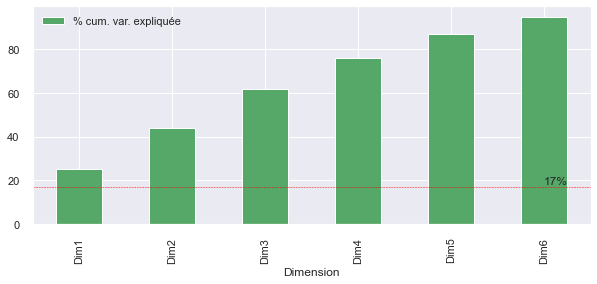

In [3018]:
eig.plot.bar(x = "Dimension", y = "% cum. var. expliquée", color="g") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "red", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [3019]:
pca.explained_variance_ratio_

array([0.25314974, 0.19078041, 0.17390546, 0.14254173, 0.11275076,
       0.08166662])

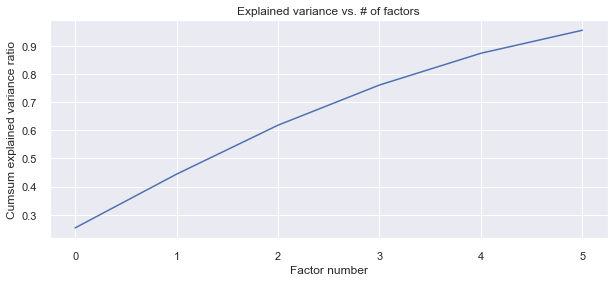

In [3020]:
#cumul de variance expliquée
plt.plot(np.arange(0,p),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


On conserve 3 dimensions.

In [3021]:
# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "Dim3" : WGI_pca[:,2],
    "product": data_study["product_name"],
    "nutrition_grade_fr" : data_study["nutrition_grade_fr"]
})

# Résultat (premières lignes)
WGI_pca_df.head()

,Dim1,Dim2,Dim3,product,nutrition_grade_fr
0,-1.450211,0.254762,0.386345,FRESH ORGANIC CARROTS,A
1,1.378170,-0.766225,-0.308140,QUICHE LORRAINE,B
2,-0.786057,-0.355304,-1.140910,"PEPSI, NOUVEAU GOÛT !",E
3,1.037111,0.844808,-0.838885,"ICE CREAM, VANILLA",D
4,-1.331259,-0.568884,0.608698,ROMAINE HEARTS,A


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


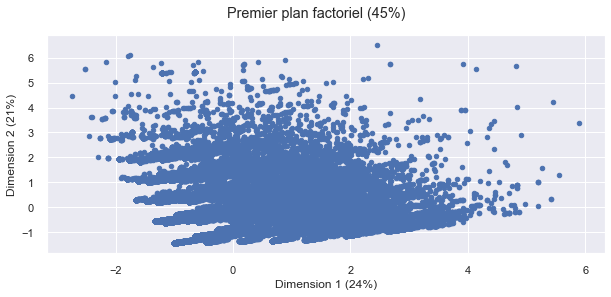

In [2962]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (24%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (21%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (45%)") # titre général
plt.show()

In [2963]:
WGI_num

array([[-1.45021125,  0.25476207,  0.38634537, -0.07105427,  0.04411982,
         0.23449925],
       [ 1.37816966, -0.76622548, -0.30814048, -0.52432624,  0.72603436,
         0.77442826],
       [-0.78605699, -0.35530443, -1.14091026,  0.12317251,  0.05242835,
        -0.11921274],
       ...,
       [-1.14907957, -0.61953649, -0.37655285,  0.10699029,  0.53622062,
        -0.44962597],
       [-1.00485924, -1.43430104, -0.13312431,  0.03186367,  0.20530648,
         0.12579092],
       [-1.00851123, -1.43558475, -0.13617038,  0.0202348 ,  0.2056086 ,
         0.12488316]])

In [2964]:
n_components

4

,carbohydrates_100g,proteins_100g,fat_100g,fiber_100g,salt_100g,additives_n,nutrition_score_fr_100g
0,8.97,1.28,0.00,2.600,0.19558,0.0,-2.0
1,7.86,5.36,6.79,0.357,0.49900,3.0,2.0
2,10.40,0.00,0.00,0.000,0.02540,2.0,13.0
3,22.54,2.82,11.27,0.000,0.14224,2.0,12.0
4,3.53,1.18,0.00,2.400,0.01524,0.0,-3.0


C:\Users\aurel\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\aurel\AppData\Roaming\Python\Python39\site-packages\seaborn\regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



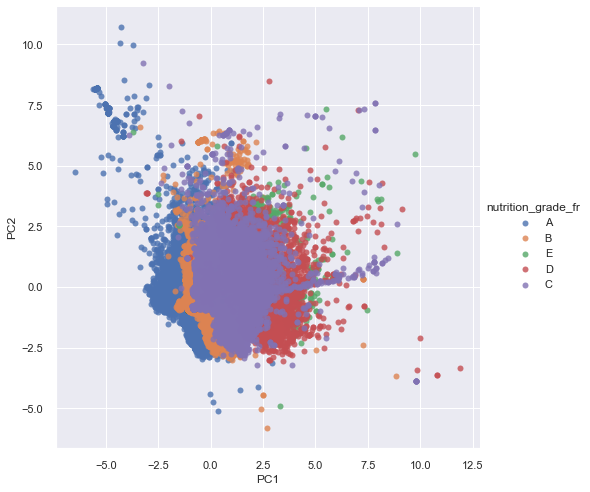

In [2965]:

# Append the principle components for each entry to the dataframe
for i in range(0, 3):
    data_study['PC' + str(i + 1)] = coord[:, i]

display(WGI_num0.head())

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='nutrition_grade_fr',data=data_study,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

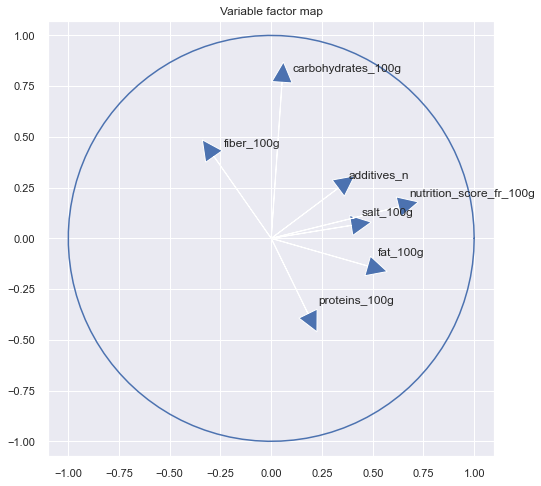

In [2966]:

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             WGI_num0.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

Le premier plan factoriel est expliqué par les variables proteins et fat positivement
Et le second plan factoriel est expliqué par les variables fibres et carbohydrate. Cependant, ces variables sont assez éloignées du bord du cercle.

Nous devons calculer le cosinus au carré pour vérifier les coefficients de corrélation avec nos axes.

Combinons nos deux graphiques précédent.

In [2929]:
cos2var = corvar**2
print(pd.DataFrame({'id':WGI_num0.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]}))

                  id        COS2_1        COS2_2
0          salt_100g  1.470557e+00  4.076666e-30
1      reg_additives  4.917903e-30  1.219010e+00
2            reg_fat  5.657521e-28  2.562877e-27
3  reg_carbohydrates  6.770696e-30  2.347727e-32
4          reg_fiber  2.205407e-29  1.788405e-29
5        reg_protein  9.034975e-29  7.362473e-31


In [ ]:
#cosinus carré des variables
cos2var = corvar**2
print(pandas.DataFrame({'id':WGI_num0.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,1]}))

In [2931]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les trois premiers axes
print(pd.DataFrame({'id':WGI_num0.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2]}))

                  id         CTR_1         CTR_2         CTR_3
0          salt_100g  6.800143e-01  2.743411e-30  3.580519e-28
1      reg_additives  2.274134e-30  8.203380e-01  1.994777e-27
2            reg_fat  2.616148e-28  1.724699e-27  9.306830e-01
3  reg_carbohydrates  3.130902e-30  1.579914e-32  1.032440e-29
4          reg_fiber  1.019823e-29  1.203515e-29  2.854703e-28
5        reg_protein  4.177948e-29  4.954609e-31  3.716783e-30


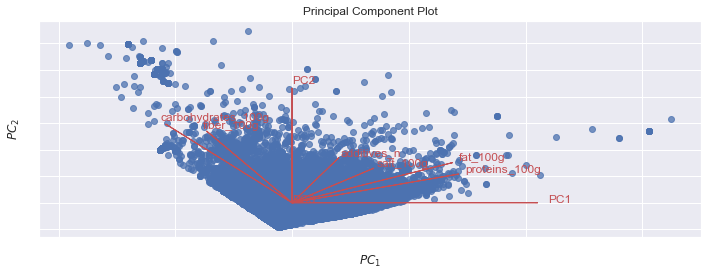

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [1897]:
####mettre en 3d
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA
from yellowbrick.style import set_palette

# Load the concrete dataset
plt.figure()
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(WGI_num0)
visualizer.poof()

Nous observons 2 groupes extrêmes :un qui est caractérisé par un fort nombre de carbohydrates et de fibres et le deuxième groupe qui est caractérisé par un fort nombre de protéines et de matières grasses.

Des variables semblent être liées : 
- carbohydrates et fibres
- fat et protéine

Réalisons une classification hiérarchique afin de classer nos aliments.


## c ) Classification ascendante hiérarchique

Nous allons extraire un échantillon de notre base de données afin de réduire la population. Les calculs sur une population importante pose problème selon la puissance de l'ordinateur.

In [2655]:
data_study["nutrition_grade_fr"].value_counts()

B    21172
A    19430
C    16351
D     6838
E     1047
Name: nutrition_grade_fr, dtype: int64

In [2656]:
test_a=data_study.loc[data_study["nutrition_grade_fr"]=="A"].sample(1100)
test_b=data_study.loc[data_study["nutrition_grade_fr"]=="B"].sample(1100)
test_c=data_study.loc[data_study["nutrition_grade_fr"]=="C"].sample(1100)
test_d=data_study.loc[data_study["nutrition_grade_fr"]=="D"].sample(1100)
test_e=data_study.loc[data_study["nutrition_grade_fr"]=="E"].sample(1047)

In [2657]:
frames = [test_a, test_b, test_c, test_d, test_e]

In [2658]:
test = pd.concat(frames)

In [2659]:
test.shape


(5447, 24)

In [2660]:
test2=test.drop(columns =data_study.select_dtypes(include=['object', 'string']).columns)


In [2661]:
test3 = test2.drop(columns =["reg_additives", "reg_energy", "reg_fat","reg_carbohydrates", "reg_fiber",
                                  "reg_protein","ingredients_from_palm_oil_n",
                             "ingredients_that_may_be_from_palm_oil_n",
                                  "energy_100g", "saturated_fat_100g",  "sugars_100g"])

In [2662]:
test2 = test2.drop(columns =["reg_additives", "reg_energy", "reg_fat","reg_carbohydrates", "reg_fiber",
                                  "reg_protein", "nutrition_score_fr_100g","ingredients_from_palm_oil_n",
                             "ingredients_that_may_be_from_palm_oil_n",
                                  "energy_100g", "saturated_fat_100g",  "sugars_100g"])

In [2919]:
test3.columns

Index(['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'fiber_100g',
       'salt_100g', 'additives_n', 'nutrition_score_fr_100g'],
      dtype='object')

In [2663]:
test2.describe(include="all")

,carbohydrates_100g,proteins_100g,fat_100g,fiber_100g,salt_100g,additives_n
count,5447.000000,5447.000000,5447.00000,5447.000000,5447.000000,5447.000000
mean,13.981004,4.502841,3.62144,1.142166,1.231247,1.885258
std,12.711992,6.465820,5.52684,2.964356,2.796167,2.302950
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.360000,0.100000,0.00000,0.000000,0.050000,0.000000
50%,10.600000,2.000000,0.81000,0.100000,0.462280,1.000000
75%,18.180000,5.420000,5.88000,1.500000,1.428740,3.000000
max,100.000000,86.000000,100.00000,45.000000,39.794180,20.000000


### Réalisons un dendrogramme

In [2922]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(test2)
X_scaled = std_scale.transform(test2)

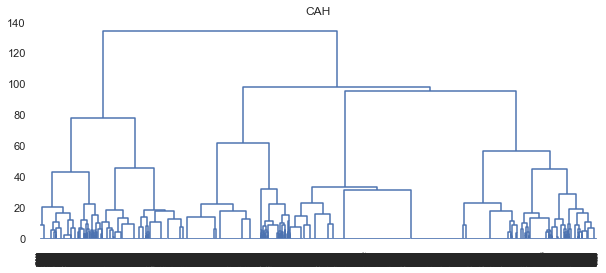

In [2923]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens
Z = linkage(X_scaled,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=test2.index,color_threshold=0)
plt.show()

Nous pourrions faire 5 groupes. Réalisons ce découpage en affichant le nutriscore.

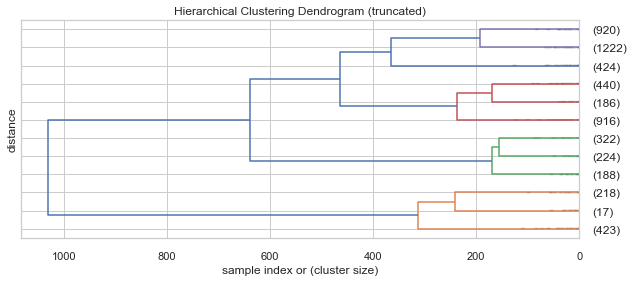

In [1368]:
#matérialisation des 5 classes (hauteur t = 350)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(Z,labels=test.index,orientation='left',color_threshold=350,
           truncate_mode = 'lastp' ,   # afficher uniquement les p derniers clusters fusionnés 
    p = 12 ,   # afficher uniquement les p derniers clusters fusionnés 
   
    leaf_font_size = 12. , 
    show_contracted = True
          )
plt.show()


In [1437]:
#découpage à la hauteur t = 350 ==> identifiants de 5 groupes obtenus
groupes_cah = fcluster(Z,t=350,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observatbbions et leurs groupes
info_groupe=pd.DataFrame(test.index[idg],groupes_cah[idg])

[5 3 2 ... 5 1 4]


In [1439]:
WGI_pca_k2 = test.assign(classe = info_groupe.index)

C:\Users\aurel\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



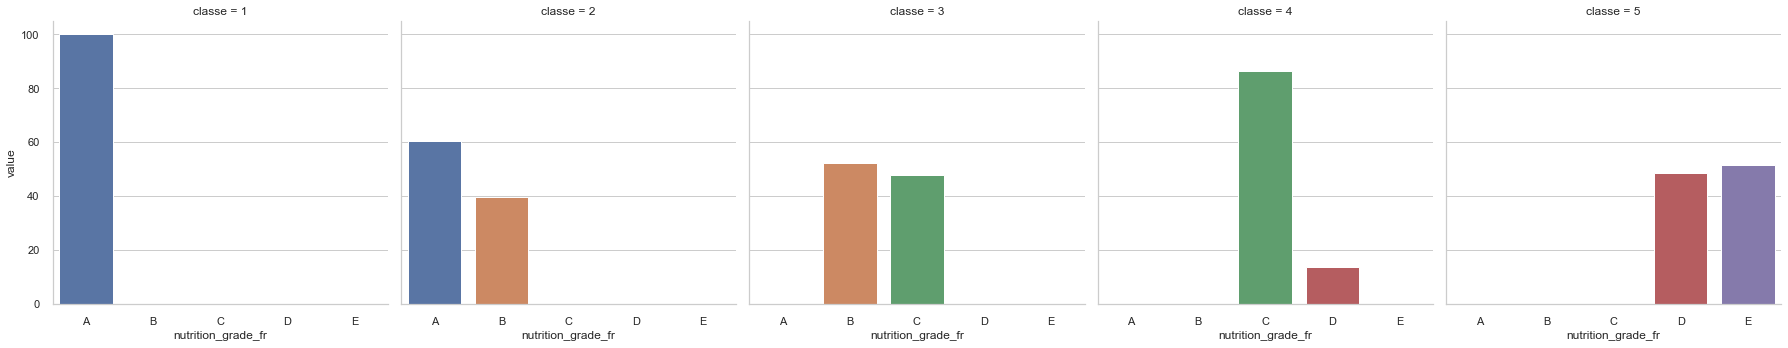

In [1441]:
t = pd.crosstab(WGI_pca_k2.nutrition_grade_fr, WGI_pca_k2.classe, normalize = "columns")
t = t.assign(nutrition_grade_fr = t.index)
tm = pd.melt(t, id_vars = "nutrition_grade_fr")
tm = tm.assign(value = 100 * tm.value)

sns.catplot("nutrition_grade_fr", y = "value", col = "classe", data = tm, kind = "bar")

## d) Essayons d'utiliser KMeans

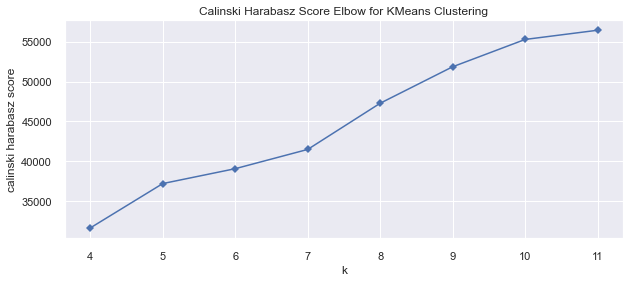

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [769]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

X = WGI_num0
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X = WGI_num0

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Nous essayerons 5 groupes.

In [203]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 5)
kmeans2.fit(scale(WGI_num0))

KMeans(n_clusters=5)

In [204]:
kmeans2.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [205]:
pd.Series(kmeans2.labels_).value_counts()

1    46643
0    15192
4     2380
3      346
2      277
dtype: int64

In [206]:
kmeans2.cluster_centers_

array([[ 2.12788087e-01, -7.28384579e-02, -1.92222716e-01,
         1.06846132e+00, -4.31635994e-01, -1.85025624e-01,
         1.21527918e+00,  4.89153707e-01],
       [-1.51205775e-01, -7.28384579e-02, -1.92222716e-01,
        -3.66061956e-01,  1.00883510e-01,  2.08537789e-03,
        -3.98871455e-01, -1.56571685e-01],
       [-4.65196828e-01, -7.28384579e-02, -1.92222716e-01,
        -4.63881956e-01,  3.47205996e+00,  1.16898975e+01,
         2.04440950e+00,  1.49768318e-01],
       [ 1.03793312e+00,  1.35765833e+01,  1.66702248e+00,
         4.91986189e-01,  1.28024367e-01, -4.28262950e-02,
        -1.66782021e-01,  1.27631774e-01],
       [ 1.51334488e+00, -7.28384579e-02,  4.77417964e+00,
         3.56206237e-01,  3.48014406e-01, -2.16729985e-01,
        -1.31633598e-01, -8.09191120e-02]])

In [207]:
WGI_k2 = WGI_num0.assign(classe = kmeans2.labels_)
WGI_k2.groupby("classe").mean()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g
classe,,,,,,,,
0,2.144484,0.000000,0.000000,7.924218,7.525671,0.927374,12.173455,1.874105
1,1.328688,0.000000,0.000000,1.427932,13.414554,1.458435,2.293411,0.581108
2,0.631769,0.000000,0.000000,0.989170,50.889603,34.663538,17.271119,1.195669
3,3.976879,1.011561,0.401734,5.316251,13.720462,1.330685,3.717890,1.151274
4,5.034874,0.000000,1.073109,4.701595,16.165664,0.836622,3.933328,0.733029


In [208]:
WGI_k2

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,classe
0,0.0,0.0,0.0,0.00,8.97,2.600,1.28,0.19558,1
1,3.0,0.0,0.0,6.79,7.86,0.357,5.36,0.49900,0
2,2.0,0.0,0.0,0.00,10.40,0.000,0.00,0.02540,1
3,2.0,0.0,0.0,11.27,22.54,0.000,2.82,0.14224,0
4,0.0,0.0,0.0,0.00,3.53,2.400,1.18,0.01524,1
...,...,...,...,...,...,...,...,...,...
76476,0.0,0.0,0.0,0.00,16.67,10.000,0.00,3.21818,1
76477,0.0,0.0,0.0,5.33,13.33,2.000,4.67,1.37160,1
76478,0.0,0.0,0.0,0.50,10.20,0.600,0.60,0.03000,1
76483,0.0,0.0,0.0,0.20,0.50,0.200,0.50,0.02540,1


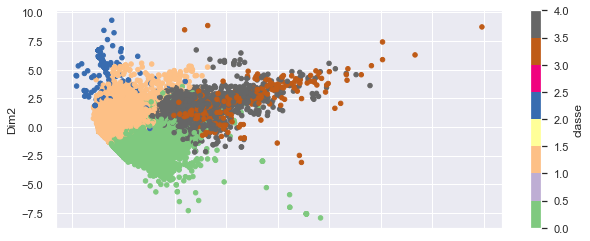

In [209]:
WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans2.labels_)
WGI_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

In [210]:
WGI_pca_k2.shape

(64838, 9)

C:\Users\aurel\AppData\Local\Temp/ipykernel_3032/4273427348.py:1: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



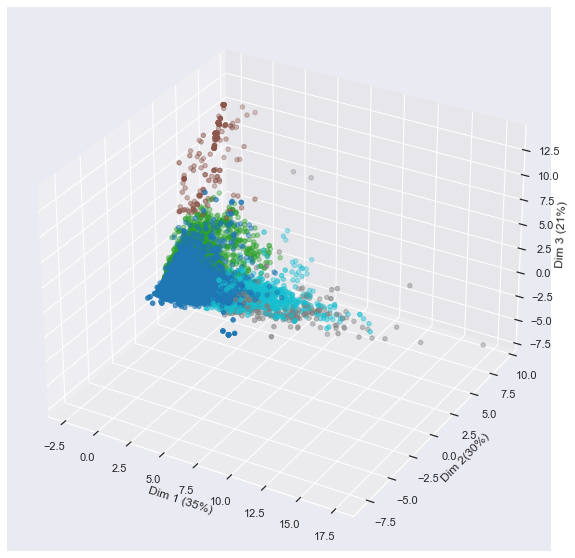

In [211]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans2.labels_)
ax.scatter(
    xs=WGI_pca_k2["Dim1"], 
    ys=WGI_pca_k2["Dim2"], 
    zs=WGI_pca_k2["Dim3"],
    c=WGI_pca_k2["classe"],
    cmap='tab10'
)
ax.set_xlabel('Dim 1 (35%)')
ax.set_ylabel('Dim 2(30%)')
ax.set_zlabel('Dim 3 (21%)')
plt.show()

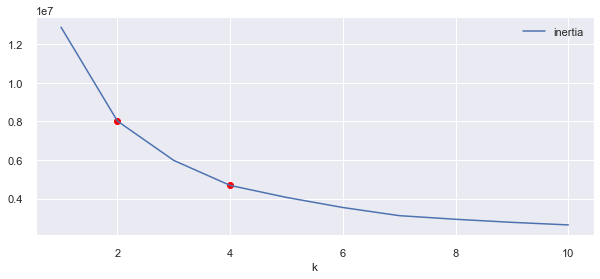

In [212]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(WGI_num0)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(4, inertia.query('k == 4')["inertia"], c = "red")
plt.show()

coude plus marqué au niveau du 4

In [213]:
WGI_pca_k2

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,product,nutrition_grade_fr,classe
0,-1.136592,0.298666,-0.193063,0.287973,-0.117229,-0.312695,FRESH ORGANIC CARROTS,A,1
1,0.596935,-0.589825,-0.251736,-0.267180,-0.328047,0.589828,QUICHE LORRAINE,B,0
2,-0.582505,0.374299,-0.993721,-0.171078,0.093119,0.109037,"PEPSI, NOUVEAU GOÛT !",E,1
3,0.773482,0.008422,0.219318,-0.407031,-0.481190,1.767529,"ICE CREAM, VANILLA",D,0
4,-1.191909,-0.005280,-0.452546,0.345469,-0.216621,-0.429060,ROMAINE HEARTS,A,1
...,...,...,...,...,...,...,...,...,...
76476,-1.106544,1.431242,2.177748,0.555039,0.709371,-0.873285,CHIPOTLE PEPPERS IN ADOBO SAUCE,C,1
76477,-0.302272,-0.290368,0.517617,0.139850,0.061197,0.297056,DAL MAKHANI,B,1
76478,-1.053880,0.162916,-0.663141,0.133020,-0.012048,0.018949,100% PUR JUS 4 AGRUMES,C,1
76483,-1.150123,-0.398266,-1.095375,0.225410,-0.032823,-0.248299,THÉ VERT EARL GREY,C,1


Ces 4 classes vont permettre de manger équilibrer en les combinant.

Comparons les nouveaux groupes et le nutriscore.

In [214]:
pd.crosstab(WGI_pca_k2.classe, WGI_pca_k2.nutrition_grade_fr, normalize = True)

nutrition_grade_fr,A,B,C,D,E
classe,,,,,
0,0.051097,0.050233,0.071100,0.059440,0.002437
1,0.239119,0.264397,0.163700,0.039344,0.012817
2,0.003532,0.000046,0.000447,0.000154,0.000093
3,0.000586,0.001619,0.002622,0.000494,0.000015
4,0.005336,0.010241,0.014313,0.006030,0.000787


<AxesSubplot:xlabel='classe', ylabel='nutrition_grade_fr'>

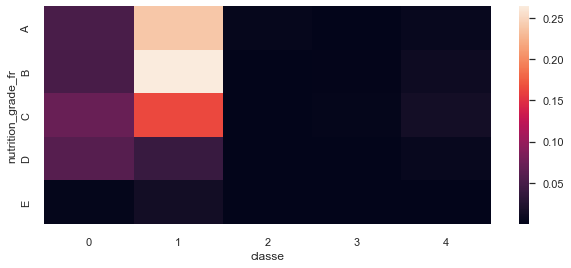

In [215]:
sns.heatmap(pd.crosstab(WGI_pca_k2.nutrition_grade_fr, WGI_pca_k2.classe, normalize = True))

C:\Users\aurel\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



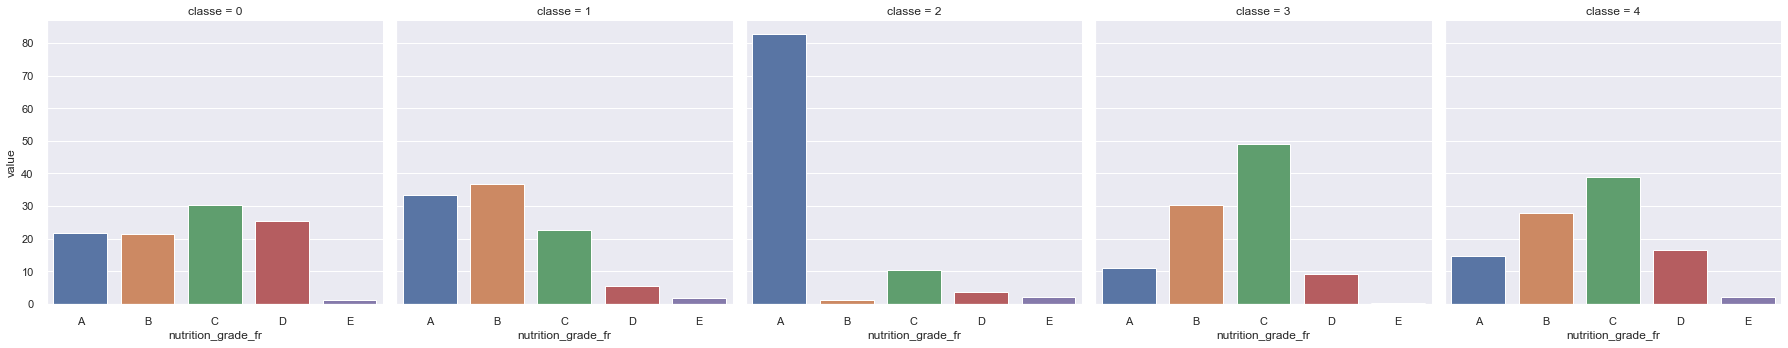

In [216]:
t = pd.crosstab(WGI_pca_k2.nutrition_grade_fr, WGI_pca_k2.classe, normalize = "columns")
t = t.assign(nutrition_grade_fr = t.index)
tm = pd.melt(t, id_vars = "nutrition_grade_fr")
tm = tm.assign(value = 100 * tm.value)

sns.catplot("nutrition_grade_fr", y = "value", col = "classe", data = tm, kind = "bar")

Aucun groupe ne semble se demarquer, excepté la classe 2.

Les autres groupes sont homogènes. Ce découpage ne semble pas adapter et est assez aléatoire.

## e) Testons un mix de Kmeans et CAH

Créons un nombre de groupe important avec kmeans

In [2224]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
# suppression des co!lonnes non numériques
WGI_num0 = data_study.drop(columns =data_study.select_dtypes(include=['object', 'string']).columns)
WGI_num0 = WGI_num0.drop(columns =["reg_additives", "reg_energy", "reg_fat", "reg_carbohydrates", "reg_fiber",
                                  "reg_protein", "nutrition_score_fr_100g",
                                  "energy_100g", "saturated_fat_100g", "sugars_100g", "ingredients_that_may_be_from_palm_oil_n",
                                  "ingredients_from_palm_oil_n"])
WGI_num0=WGI_num0.loc[ (pd.isna(data.carbohydrates_100g)==False) & (pd.isna(data.proteins_100g)==False) 
                       & (pd.isna(data.fat_100g)==False)
       & (pd.isna(data["fiber_100g"])==False)
                       & (pd.isna(data["salt_100g"])==False)
& (pd.isna(data["nutrition_score_fr_100g"])==False)
                 & (pd.isna(data["nutrition_grade_fr"])==False)
                 & (pd.isna(data["additives_n"])==False)]


In [2225]:
WGI_num0.columns

Index(['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'fiber_100g',
       'salt_100g', 'additives_n'],
      dtype='object')

In [2226]:
WGI_num0.shape

(64838, 6)

In [2723]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 50)
kmeans2.fit(scale(WGI_num0))


KMeans(n_clusters=50)

In [2728]:
labels=kmeans2.labels_

In [2729]:
labels.shape

(64838,)

In [2730]:
centroid=kmeans2.cluster_centers_

In [2731]:

#perform the clustering
Z = linkage(centroid,method='ward',metric='euclidean')



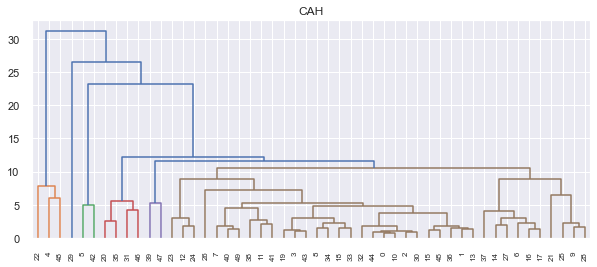

In [2735]:

#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,color_threshold=11)
plt.show()


Réalisons la CAH sur le centre des clusters

In [2736]:
#découpage à la hauteur t = 400 ==> identifiants de 5 groupes obtenus
groupes_cah = fcluster(Z,t=11,criterion='distance')
print(groupes_cah)


[5 5 5 5 1 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 1 5 5 5 5 5 5 6 5 3 5 5 5 3 5
 5 5 4 5 5 2 5 5 5 3 4 1 5]


In [2737]:
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observatbbions et leurs groupes
info_groupe=pd.DataFrame(centroid[idg],groupes_cah[idg], columns=['0','1','2','3','4','5'])

In [2738]:
info_groupe

,0,1,2,3,4,5
1,-0.477576,-0.019263,-0.431788,-0.416685,10.713555,-0.201691
1,6.609830,-0.726038,-0.618331,-0.511210,12.705637,-0.260658
1,0.229781,-0.459716,-0.642334,-0.287409,16.619674,-0.024755
2,4.381427,2.684852,-0.581699,13.159430,-0.339488,-0.701024
2,1.178492,0.621858,-0.312878,10.215415,0.239029,-0.079461
3,1.142373,0.708996,-0.077384,3.676401,5.786269,-0.353964
3,1.251143,-0.256176,-0.303649,-0.215730,3.726618,0.141012
3,-0.125263,0.818988,-0.064911,-0.230046,6.266536,-0.287192
3,-0.541169,-0.660873,-0.555087,-0.280834,1.953473,0.001195
4,6.731428,-0.230935,-0.260564,-0.083148,-0.151862,-0.106215


Faisons une jointure entre kmeans et cah

In [2739]:
info_groupe

,0,1,2,3,4,5
1,-0.477576,-0.019263,-0.431788,-0.416685,10.713555,-0.201691
1,6.609830,-0.726038,-0.618331,-0.511210,12.705637,-0.260658
1,0.229781,-0.459716,-0.642334,-0.287409,16.619674,-0.024755
2,4.381427,2.684852,-0.581699,13.159430,-0.339488,-0.701024
2,1.178492,0.621858,-0.312878,10.215415,0.239029,-0.079461
3,1.142373,0.708996,-0.077384,3.676401,5.786269,-0.353964
3,1.251143,-0.256176,-0.303649,-0.215730,3.726618,0.141012
3,-0.125263,0.818988,-0.064911,-0.230046,6.266536,-0.287192
3,-0.541169,-0.660873,-0.555087,-0.280834,1.953473,0.001195
4,6.731428,-0.230935,-0.260564,-0.083148,-0.151862,-0.106215


In [2740]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = WGI_num0.index
cluster_map['cluster'] = kmeans2.labels_

In [2741]:
max(cluster_map["cluster"])

49

In [2742]:
centroid_map = pd.DataFrame(columns=["cluster", "0", "1", "2", "3", "4", "5"])
for i in range(0,max(cluster_map["cluster"])+1):
    centroid_map.loc[i] = i, kmeans2.cluster_centers_[i][0],kmeans2.cluster_centers_[i][1], kmeans2.cluster_centers_[i][2], kmeans2.cluster_centers_[i][3],kmeans2.cluster_centers_[i][4],kmeans2.cluster_centers_[i][5]
    

In [2743]:
centroid_map.shape

(50, 7)

In [2744]:
info_groupe["classe_cah"]=info_groupe.index

In [2745]:
cluster_map

,data_index,cluster
0,0,30
1,1,34
2,2,19
3,3,1
4,4,30
...,...,...
64833,76476,11
64834,76477,15
64835,76478,2
64836,76483,10


In [2746]:
data_merge = pd.merge(centroid_map, info_groupe, how="left", on=["0", "1", "2","3","4","5"], indicator=True,  suffixes=('', '_del'))
data_result = data_merge.loc[data_merge["_merge"] == "both"].drop("_merge", axis=1)


In [2747]:
cah=data_result

In [2748]:
cluster_map.describe()

,data_index,cluster
count,64838.000000,64838.000000
mean,34432.880795,19.098846
std,21174.272573,14.793542
min,0.000000,0.000000
25%,16414.250000,6.000000
50%,33182.500000,15.000000
75%,50019.750000,30.000000
max,76484.000000,49.000000


In [2749]:
data_merge = pd.merge(cluster_map, cah, how="left", on=["cluster"], indicator=True,  suffixes=('', '_del'))
data_result = data_merge.loc[data_merge["_merge"] == "both"].drop("_merge", axis=1)




In [2750]:
mix_kmeans_cah=data_result

In [2751]:
mix_kmeans_cah

,data_index,cluster,0,1,2,3,4,5,classe_cah
0,0,30,-0.440525,-0.483537,-0.579312,0.448554,-0.183937,-0.678756,5
1,1,34,-0.142423,-0.033927,0.803872,-0.065280,0.009053,1.062775,5
2,2,19,0.185095,-0.507556,-0.476741,-0.241033,-0.330066,0.322518,5
3,3,1,0.857991,-0.160006,1.432453,-0.001438,-0.100648,-0.211624,5
4,4,30,-0.440525,-0.483537,-0.579312,0.448554,-0.183937,-0.678756,5
...,...,...,...,...,...,...,...,...,...
64833,76476,11,0.294920,0.069519,-0.514178,1.286298,-0.137446,-0.519771,5
64834,76477,15,-0.328036,-0.301402,0.450733,0.092891,0.019674,-0.372551,5
64835,76478,2,0.148970,-0.666888,-0.638096,-0.204581,-0.393112,-0.580770,5
64836,76483,10,-0.772227,-0.639358,-0.645013,-0.322778,-0.274512,-0.680834,5


In [2752]:
data_study

,code,product_name,ingredients_text,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,sugars_100g,...,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,main_category,nutrition_score_fr_100g,reg_additives,reg_energy,reg_fat,reg_carbohydrates,reg_fiber,reg_protein
0,0000000069601,FRESH ORGANIC CARROTS,FRESH ORGANIC CARROTS,159.0,8.97,1.28,0.00,0.00,2.600,6.410,...,0.0,A,AUTRES,-2.0,-5.0,-5.0,-5.00,3.0,1.25,-5.00
1,0000008237798,QUICHE LORRAINE,INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES....,478.0,7.86,5.36,6.79,2.86,0.357,0.714,...,0.0,B,EN:MEALS,2.0,1.0,327.0,6.58,3.0,-5.00,2.26
2,0000040608754,"PEPSI, NOUVEAU GOÛT !","EAU GAZÉIFIÉE, SUCRE, COLORANT CARAMEL E150D, ...",177.0,10.40,0.00,0.00,0.00,0.000,10.400,...,0.0,E,EN:SODAS,13.0,1.0,169.0,-5.00,NaN,-5.00,-5.00
3,0000450193000,"ICE CREAM, VANILLA","MILK, CREAM, SUGAR, CORN SYRUP, GUAR GUM, LOCU...",883.0,22.54,2.82,11.27,7.04,0.000,16.900,...,0.0,D,AUTRES,12.0,1.0,709.0,6.58,5.0,-5.00,2.26
4,0000651003214,ROMAINE HEARTS,ROMAINE HEARTS.,75.0,3.53,1.18,0.00,0.00,2.400,1.180,...,0.0,A,AUTRES,-3.0,-5.0,-5.0,-5.00,1.0,1.25,-5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76476,95656335,CHIPOTLE PEPPERS IN ADOBO SAUCE,"CHIPOTLE PEPPERS, WATER, VINEGAR, TOMATOES, ON...",280.0,16.67,0.00,0.00,0.00,10.000,6.670,...,0.0,C,AUTRES,6.0,-5.0,169.0,-5.00,5.0,9.60,-5.00
76477,95659305,DAL MAKHANI,"TOMATO, BLACK GRAM, WATER, MILK CREAM, COTTONS...",502.0,13.33,4.67,5.33,1.00,2.000,0.000,...,0.0,B,AUTRES,2.0,-5.0,327.0,2.25,NaN,1.25,2.26
76478,9577283844672,100% PUR JUS 4 AGRUMES,"JUS D'ORANGE (DONT PULPE 1,6%), JUS DE CLÉMENT...",192.0,10.20,0.60,0.50,0.00,0.600,9.200,...,0.0,C,EN:FRUIT-JUICES,4.0,-5.0,169.0,-5.00,NaN,-5.00,-5.00
76483,99111250,THÉ VERT EARL GREY,"THÉ VERT, ARÔME NATUREL BERGAMOTE AVEC AUTRES ...",21.0,0.50,0.50,0.20,0.20,0.200,0.500,...,0.0,C,EN:GREEN-TEAS,2.0,-5.0,-5.0,-5.00,1.0,-5.00,-5.00


In [2753]:

WGI_k2 = data_study.assign(classe = mix_kmeans_cah.classe_cah)
WGI_k2.groupby("classe").mean()


,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,sugars_100g,salt_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_score_fr_100g,reg_additives,reg_energy,reg_fat,reg_carbohydrates,reg_fiber,reg_protein
classe,,,,,,,,,,,,,,,,,,
1.0,396.879121,13.008956,4.807692,3.070055,0.851648,1.946703,6.564121,1.163010,1.373626,0.000000,0.027473,2.324176,-2.703297,312.554945,-1.212747,3.985714,-1.917308,1.196758
2.0,351.839286,13.494286,4.570491,2.678036,0.949107,1.435045,6.939911,0.780568,1.303571,0.004464,0.008929,1.758929,-2.803571,265.772321,-2.033661,3.718391,-2.364286,0.516696
3.0,384.891331,11.979879,4.753980,3.103170,1.057460,1.346436,6.505302,0.922205,1.804435,0.000000,0.028226,2.359879,-2.008065,293.762097,-1.238246,3.758750,-2.418448,1.077399
4.0,383.437126,12.859162,4.383952,2.980060,1.016228,1.688922,6.644132,0.909298,1.311377,0.000000,0.035928,1.455090,-2.748503,293.425150,-1.287485,3.645833,-1.929641,0.336707
5.0,394.851059,12.352968,4.797598,3.054065,1.033240,1.446122,6.467549,0.897872,1.679214,0.001619,0.037196,2.267615,-2.182176,303.910985,-1.168973,3.828431,-2.269826,0.922117
6.0,457.142857,11.768571,9.237857,4.392857,1.432857,3.871429,3.689286,1.057779,0.857143,0.000000,0.000000,3.285714,-3.714286,378.285714,0.808571,2.909091,-0.885714,4.773571


C:\Users\aurel\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



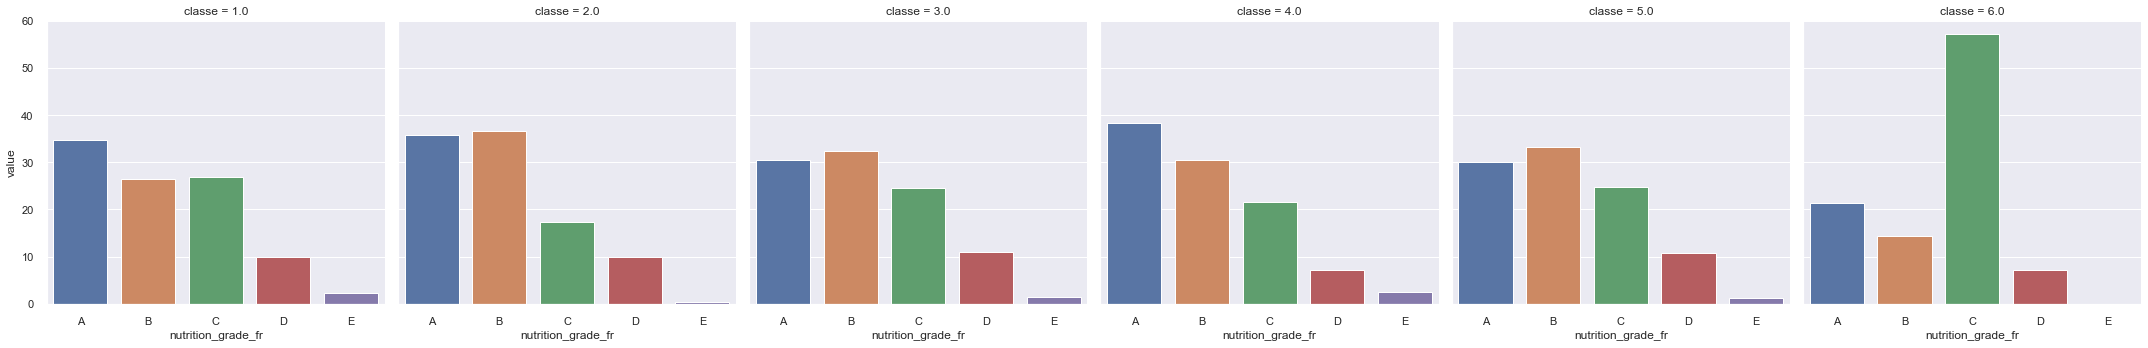

In [2754]:
t = pd.crosstab(WGI_k2.nutrition_grade_fr, WGI_k2.classe, normalize = "columns")
t = t.assign(nutrition_grade_fr = t.index)
tm = pd.melt(t, id_vars = "nutrition_grade_fr")
tm = tm.assign(value = 100 * tm.value)

sns.catplot("nutrition_grade_fr", y = "value", col = "classe", data = tm, kind = "bar")

## f) CAH : Utilisation des variables quantitatives avec regroupement

Essayons de refaire les calculs avec nos variables "regroupement"

Pour rappel :
- Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

- Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).

In [212]:
data_study = data[["code", "product_name",  #"score_total",
            "ingredients_text","energy_100g", "carbohydrates_100g", "proteins_100g", "fat_100g",
            "saturated_fat_100g", "fiber_100g", "sugars_100g", "salt_100g",
             "additives_n", "reg_salt",
            "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", 
            "nutrition_grade_fr", "main_category", "nutrition_score_fr_100g", 'reg_additives',
       'reg_energy', 'reg_fat', 'reg_carbohydrates', 'reg_fiber', 
       'reg_protein']]
data_study=data_study.loc[(pd.isna(data_study.reg_additives)==False) 
               & (pd.isna(data_study.reg_carbohydrates)==False) & (pd.isna(data_study.reg_fat)==False) 
               & (pd.isna(data_study.reg_fiber)==False)
                            & (pd.isna(data_study.nutrition_score_fr_100g)==False)
                           & (pd.isna(data_study.nutrition_grade_fr)==False)
                          & (pd.isna(data_study.reg_protein)==False)
                          & (pd.isna(data_study.reg_salt)==False)]

In [214]:

WGI_num_t2 = data_study.drop(columns = ["nutrition_score_fr_100g", "energy_100g","main_category", 
                                      "product_name","sugars_100g", "saturated_fat_100g","code", 
                                      "ingredients_text","reg_energy","salt_100g",
                                     "carbohydrates_100g", "proteins_100g", "fat_100g",
                                     "fiber_100g",  "additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"])

WGI_num_t2.columns

Index(['reg_salt', 'nutrition_grade_fr', 'reg_additives', 'reg_fat',
       'reg_carbohydrates', 'reg_fiber', 'reg_protein'],
      dtype='object')

In [215]:
WGI_num_t2["nutrition_grade_fr"].value_counts()

B    21172
A    19430
C    16351
D     6838
E     1047
Name: nutrition_grade_fr, dtype: int64

In [216]:
test_a=WGI_num_t2.loc[WGI_num_t2["nutrition_grade_fr"]=="A"].sample(2000)
test_b=WGI_num_t2.loc[WGI_num_t2["nutrition_grade_fr"]=="B"].sample(2000)
test_c=WGI_num_t2.loc[WGI_num_t2["nutrition_grade_fr"]=="C"].sample(2000)
test_d=WGI_num_t2.loc[WGI_num_t2["nutrition_grade_fr"]=="D"].sample(2000)
test_e=WGI_num_t2.loc[WGI_num_t2["nutrition_grade_fr"]=="E"].sample(1047)

frames = [test_a, test_b, test_c, test_d, test_e]

test = pd.concat(frames)


In [217]:
test.columns

Index(['reg_salt', 'nutrition_grade_fr', 'reg_additives', 'reg_fat',
       'reg_carbohydrates', 'reg_fiber', 'reg_protein'],
      dtype='object')

In [218]:
test2=test.copy()
del test2["nutrition_grade_fr"]

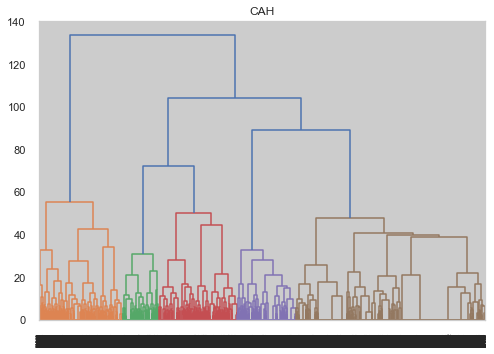

In [220]:

#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(test2,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=test.index,color_threshold=60)
plt.show()


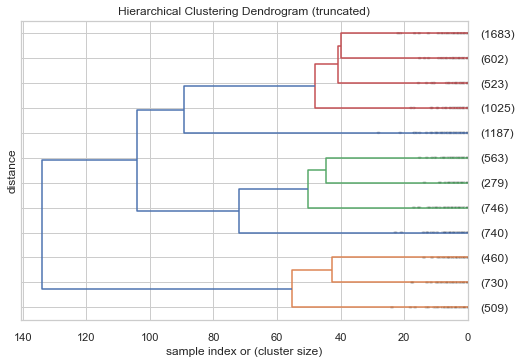

In [221]:
#matérialisation des 5 classes (hauteur t = 350)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(Z,labels=test2.index,orientation='left',color_threshold=60,
           truncate_mode = 'lastp' ,   # afficher uniquement les p derniers clusters fusionnés 
    p = 12 ,   # afficher uniquement les p derniers clusters fusionnés 
   
    leaf_font_size = 12. , 
    show_contracted = True
          )
plt.show()

In [222]:
#découpage à la hauteur t = 400 ==> identifiants de 5 groupes obtenus
groupes_cah = fcluster(Z,t=60,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observatbbions et leurs groupes
info_groupe=pd.DataFrame(test.index[idg],groupes_cah[idg])

[5 5 5 ... 5 3 5]


In [223]:
WGI_pca_k2 = test.assign(classe = info_groupe.index)


C:\Users\aurel\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



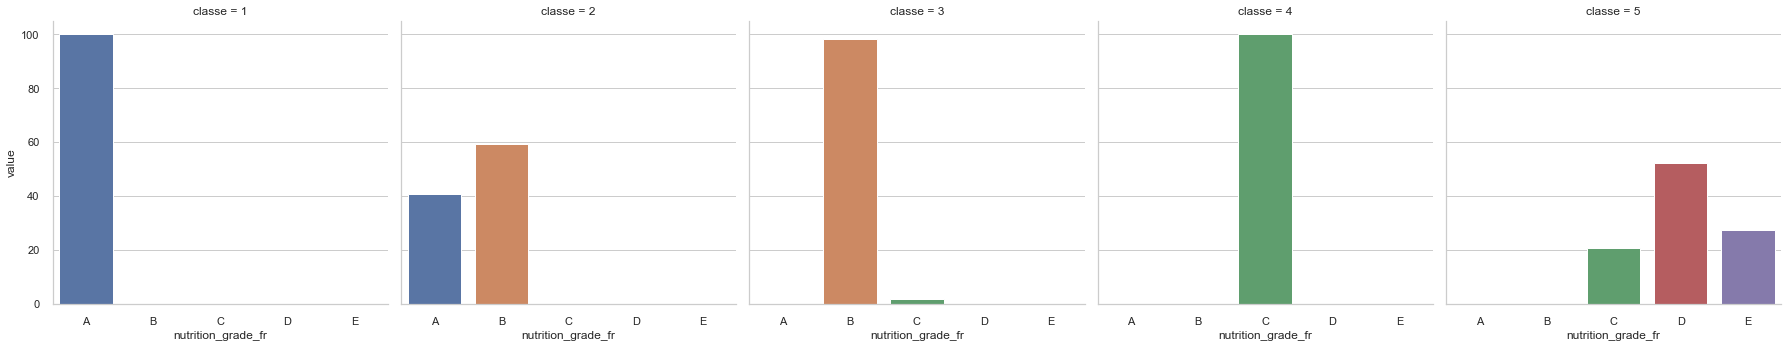

In [224]:
t = pd.crosstab(WGI_pca_k2.nutrition_grade_fr, WGI_pca_k2.classe, normalize = "columns")
t = t.assign(nutrition_grade_fr = t.index)
tm = pd.melt(t, id_vars = "nutrition_grade_fr")
tm = tm.assign(value = 100 * tm.value)

sns.catplot("nutrition_grade_fr", y = "value", col = "classe", data = tm, kind = "bar")

Ces résultats sont assez proche du nutriscore. Il y a des poids à mettre en fonction des apports nutritionnels.
Il faut donc appliquer une règle métier pour séparer les groupes qui sont proches A/B et DE.